In [1]:
# toc
import os

import matplotlib.pyplot as plt
import certifi
import numpy as np

# keras/tensorflow
from keras.api.datasets import cifar10
import tensorflow as tf

# If you have a raw python installation, you have to set the SSL_CERT_FILE environment variable
os.environ['SSL_CERT_FILE'] = certifi.where()

tf.config.set_visible_devices([], 'GPU')
plt.style.use('../maroon_ipynb.mplstyle')

# Problem 1

Keras includes the CIFAR-10 dataset, a collection of 60,000 32x32 color images. Each contains 1 of 10 different objects, and the dataset is often used as a benchmark for classification schemes. The 10 different classes are: airplane, car, bird, cat, deer, dog, frog, horse, ship, and truck. In this assignment you will build a CNN to attempt to correctly classify these images.

Check the labels on the data to see how many of each class are present in the training and test datasets. Do you foresee any issues with this data balance? Plot a few of the images as well to get a sense for what the images look like to the human eye.

## Solution

In [2]:
# load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize the data
x_train = x_train/255
x_test = x_test/255

Upon inspection of the data, we see that `x_train` is a 50,000x32x32x3 array meaning we have 50,000 images of size 32x32 with 3 color channels. `y_train` is a 50,000x1 array of labels. `x_test` is a 10,000x32x32x3 array and `y_test` is a 10,000x1 array of labels. The target values are represented with integers from 0 to 9, corresponding to the class names below as the `class_names` list.

Let's show the first of each class that we see in the training data.

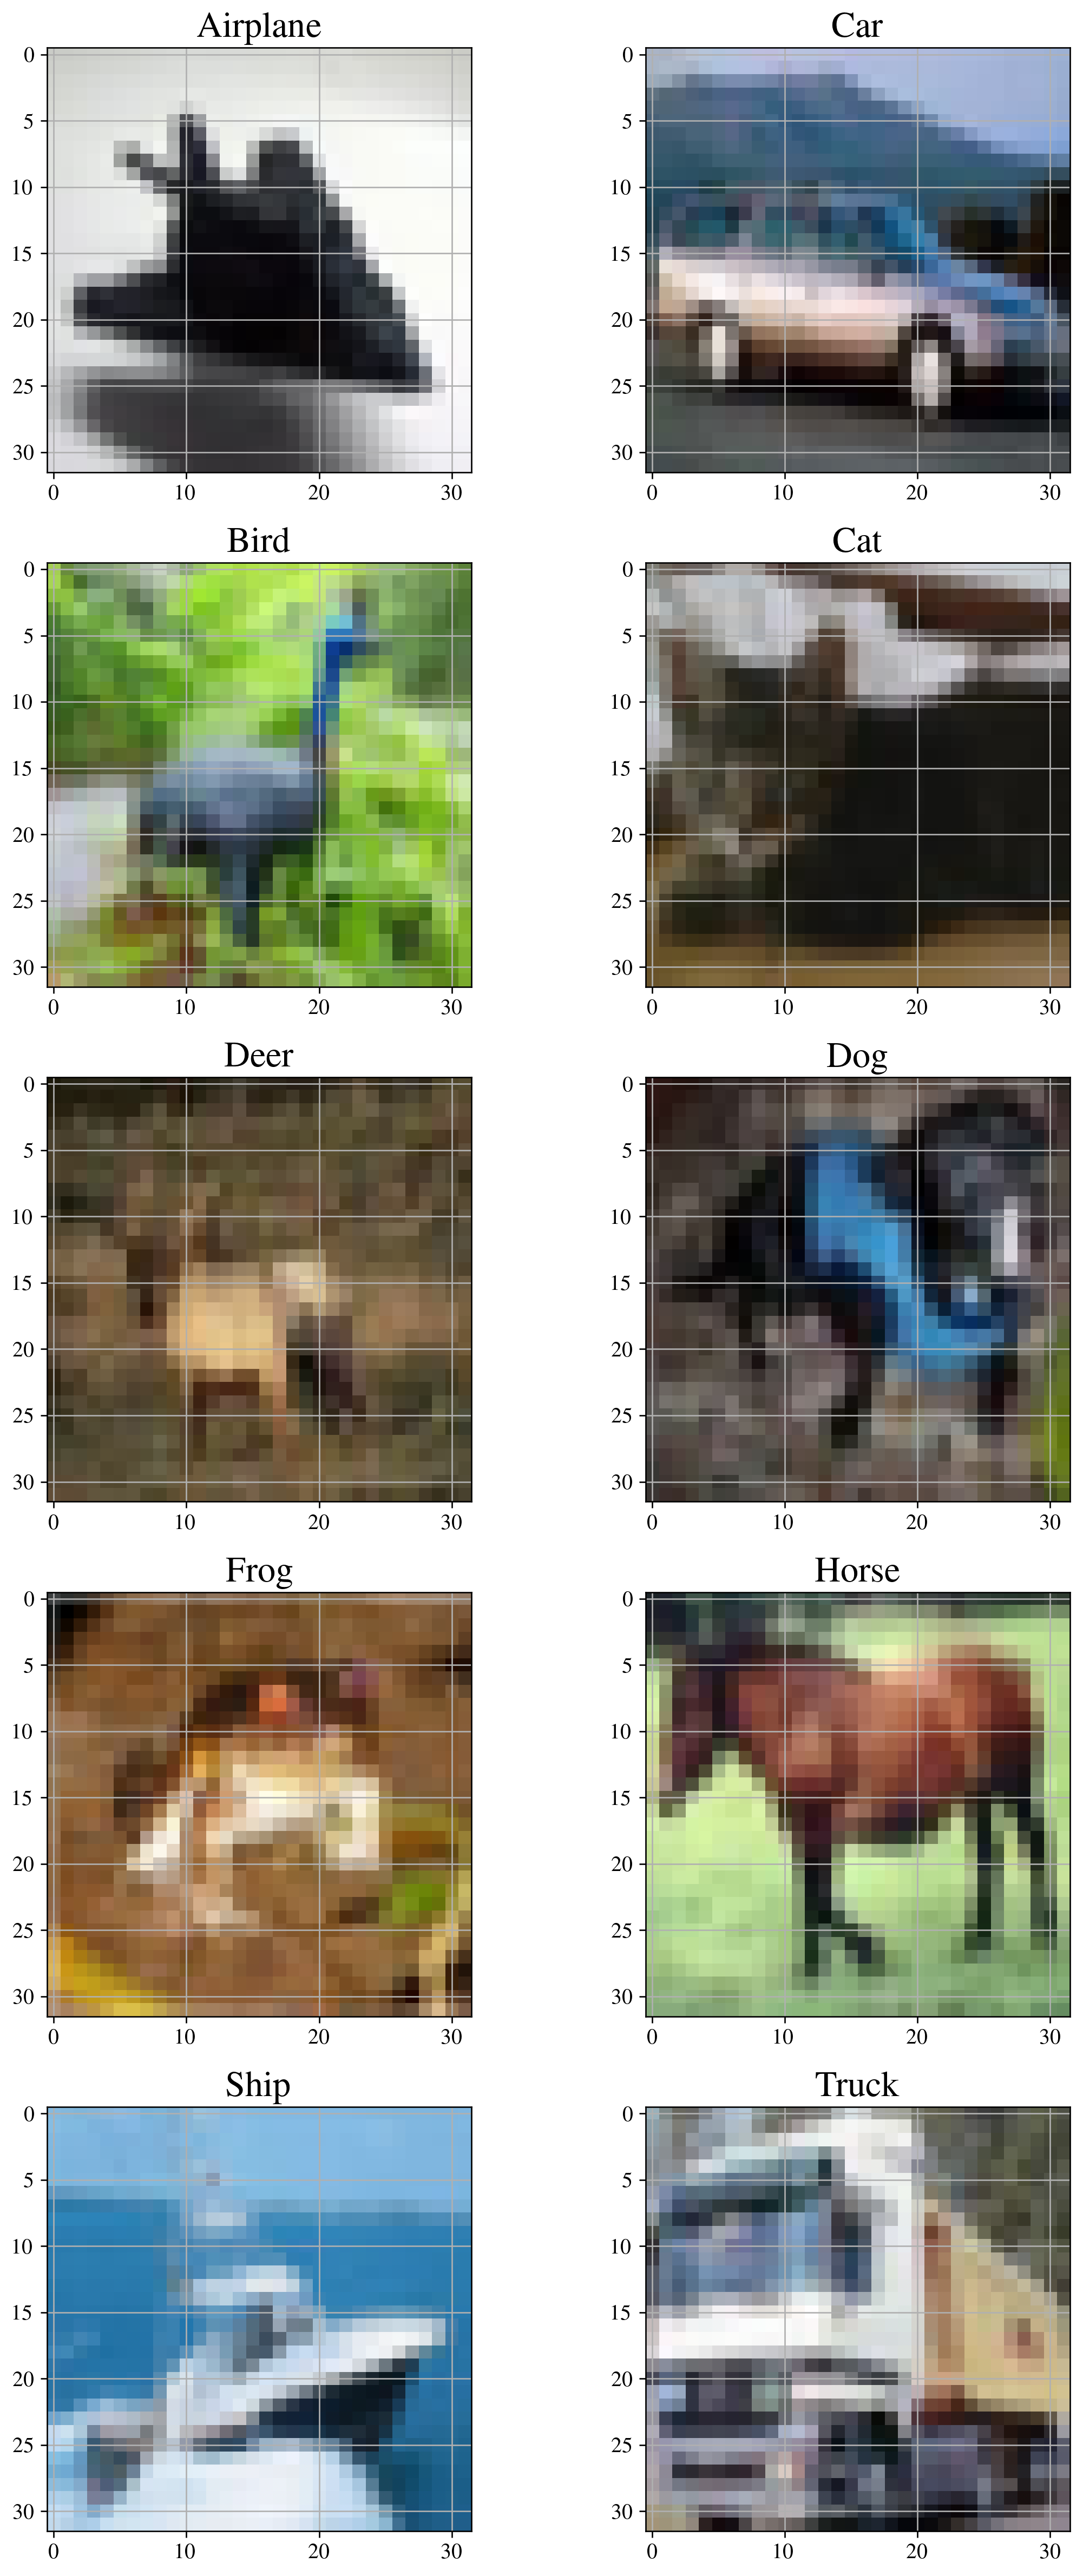

In [3]:
# Plotting the images
# class names order is seen in the doc strings of cifar10
class_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
classes_seen = set()

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
axes = ax.flatten()

i = 0
while len(classes_seen) < len(class_names):
    label = y_train[i][0]
    if label not in classes_seen:
        classes_seen.add(label)
        axes[label].imshow(x_train[i])
        axes[label].set_title(class_names[label])
    i += 1
plt.show()

In [4]:
# Finding the number of each class in the training and test data
train_counts = np.bincount(y_train.flatten())
test_counts = np.bincount(y_test.flatten())

# print the counts
for i, class_name in enumerate(class_names):
    print(f'{class_name}: {train_counts[i]} training images, {test_counts[i]} test images')

Airplane: 5000 training images, 1000 test images
Car: 5000 training images, 1000 test images
Bird: 5000 training images, 1000 test images
Cat: 5000 training images, 1000 test images
Deer: 5000 training images, 1000 test images
Dog: 5000 training images, 1000 test images
Frog: 5000 training images, 1000 test images
Horse: 5000 training images, 1000 test images
Ship: 5000 training images, 1000 test images
Truck: 5000 training images, 1000 test images


The CIFAR-10 dataset is designed so that each of the 10 classes has the same number of images—specifically, 5000 training images and 1000 test images per class. This balance ensures that models trained on the dataset don’t become biased towards any one class and helps provide a fair evaluation during testing. So no, I don't foresee any issues with this data balance.